# Weather warnings, by county, for National Weather Service

#### Import Python tools

In [1]:
%load_ext lab_black

In [2]:
import pandas as pd
import geopandas as gpd
import altair as alt
import altair_stiles as altstiles
import numpy as np
import requests

In [3]:
alt.themes.register("stiles", altstiles.theme)
alt.themes.enable("grid")

ThemeRegistry.enable('grid')

In [4]:
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 1000
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [5]:
today = pd.to_datetime("today").strftime("%Y-%m-%d")

In [6]:
today

'2022-09-05'

---

In [7]:
url = "https://tgftp.nws.noaa.gov/SL.us008001/DF.sha/DC.cap/DS.WWA/current_all.tar.gz"
target_path = "data/raw/current_all.tar.gz"
open_path = "data/raw/nws_current_all/"

In [8]:
response = requests.get(url, stream=True)
if response.status_code == 200:
    with open(target_path, "wb") as f:
        f.write(response.raw.read())

In [9]:
import tarfile

# open file
file = tarfile.open(target_path)

# print file names
print(file.getnames())

# extract files
file.extractall(open_path)

# close file
file.close()

['current_all.shp', 'current_all.shx', 'current_all.dbf', 'current_all.cpg', 'current_all.prj']


In [10]:
gdf_src = gpd.read_file(open_path)

<AxesSubplot:>

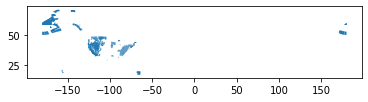

In [11]:
gdf_src.plot()

In [12]:
gdf_src.columns = gdf_src.columns.str.lower()

In [13]:
# [gdf_src["prod_type"] == "Excessive Heat Warning"].plot()

In [14]:
gdf_src[gdf_src["prod_type"].str.contains("Heat")]

,cap_id,msg_type,prod_type,vtec,phenom,sig,wfo,event,issuance,expiration,onset,ends,url,geometry
56,urn:oid:2.49.0.1.840.0.122016bc23a491cc7bc0f96...,NPW,Excessive Heat Warning,/O.CON.KSGX.EH.W.0005.000000T0000Z-220908T0300Z/,EH,W,KSGX,0005,2022-09-05T04:17:00-07:00,2022-09-05T16:00:00-07:00,2022-09-05T04:17:00-07:00,2022-09-07T20:00:00-07:00,https://alerts-v2.weather.gov/#/?id=urn:oid:2....,"POLYGON ((-117.64871 33.85924, -117.64751 33.8..."
57,urn:oid:2.49.0.1.840.0.4c939025b3fcc218365fc6f...,NPW,Excessive Heat Warning,/O.EXT.KSGX.EH.W.0005.000000T0000Z-220908T0300Z/,EH,W,KSGX,0005,2022-09-04T02:48:00-07:00,2022-09-04T14:00:00-07:00,2022-09-04T02:48:00-07:00,2022-09-07T20:00:00-07:00,https://alerts-v2.weather.gov/#/?id=urn:oid:2....,"POLYGON ((-117.64871 33.85924, -117.64751 33.8..."
58,urn:oid:2.49.0.1.840.0.a042af3d19b41e44b5a1f6a...,NPW,Excessive Heat Warning,/O.CON.KSGX.EH.W.0005.000000T0000Z-220907T0300Z/,EH,W,KSGX,0005,2022-09-03T13:22:00-07:00,2022-09-03T21:30:00-07:00,2022-09-03T13:22:00-07:00,2022-09-06T20:00:00-07:00,https://alerts-v2.weather.gov/#/?id=urn:oid:2....,"POLYGON ((-117.64871 33.85924, -117.64751 33.8..."
59,urn:oid:2.49.0.1.840.0.d686c83a1ca5c6da96fab62...,NPW,Excessive Heat Warning,/O.CON.KSGX.EH.W.0005.000000T0000Z-220907T0300Z/,EH,W,KSGX,0005,2022-09-02T13:25:00-07:00,2022-09-02T21:30:00-07:00,2022-09-02T13:25:00-07:00,2022-09-06T20:00:00-07:00,https://alerts-v2.weather.gov/#/?id=urn:oid:2....,"POLYGON ((-117.64871 33.85924, -117.64751 33.8..."
60,urn:oid:2.49.0.1.840.0.122016bc23a491cc7bc0f96...,NPW,Excessive Heat Warning,/O.CON.KSGX.EH.W.0005.000000T0000Z-220908T0300Z/,EH,W,KSGX,0005,2022-09-05T04:17:00-07:00,2022-09-05T16:00:00-07:00,2022-09-05T04:17:00-07:00,2022-09-07T20:00:00-07:00,https://alerts-v2.weather.gov/#/?id=urn:oid:2....,"POLYGON ((-117.46560 34.30283, -117.46553 34.3..."
61,urn:oid:2.49.0.1.840.0.4c939025b3fcc218365fc6f...,NPW,Excessive Heat Warning,/O.EXT.KSGX.EH.W.0005.000000T0000Z-220908T0300Z/,EH,W,KSGX,0005,2022-09-04T02:48:00-07:00,2022-09-04T14:00:00-07:00,2022-09-04T02:48:00-07:00,2022-09-07T20:00:00-07:00,https://alerts-v2.weather.gov/#/?id=urn:oid:2....,"POLYGON ((-117.46560 34.30283, -117.46553 34.3..."
62,urn:oid:2.49.0.1.840.0.a042af3d19b41e44b5a1f6a...,NPW,Excessive Heat Warning,/O.CON.KSGX.EH.W.0005.000000T0000Z-220907T0300Z/,EH,W,KSGX,0005,2022-09-03T13:22:00-07:00,2022-09-03T21:30:00-07:00,2022-09-03T13:22:00-07:00,2022-09-06T20:00:00-07:00,https://alerts-v2.weather.gov/#/?id=urn:oid:2....,"POLYGON ((-117.46560 34.30283, -117.46553 34.3..."
63,urn:oid:2.49.0.1.840.0.d686c83a1ca5c6da96fab62...,NPW,Excessive Heat Warning,/O.CON.KSGX.EH.W.0005.000000T0000Z-220907T0300Z/,EH,W,KSGX,0005,2022-09-02T13:25:00-07:00,2022-09-02T21:30:00-07:00,2022-09-02T13:25:00-07:00,2022-09-06T20:00:00-07:00,https://alerts-v2.weather.gov/#/?id=urn:oid:2....,"POLYGON ((-117.46560 34.30283, -117.46553 34.3..."
64,urn:oid:2.49.0.1.840.0.122016bc23a491cc7bc0f96...,NPW,Excessive Heat Warning,/O.CON.KSGX.EH.W.0005.000000T0000Z-220908T0300Z/,EH,W,KSGX,0005,2022-09-05T04:17:00-07:00,2022-09-05T16:00:00-07:00,2022-09-05T04:17:00-07:00,2022-09-07T20:00:00-07:00,https://alerts-v2.weather.gov/#/?id=urn:oid:2....,"POLYGON ((-117.51058 33.38816, -117.50782 33.3..."
65,urn:oid:2.49.0.1.840.0.4c939025b3fcc218365fc6f...,NPW,Excessive Heat Warning,/O.EXT.KSGX.EH.W.0005.000000T0000Z-220908T0300Z/,EH,W,KSGX,0005,2022-09-04T02:48:00-07:00,2022-09-04T14:00:00-07:00,2022-09-04T02:48:00-07:00,2022-09-07T20:00:00-07:00,https://alerts-v2.weather.gov/#/?id=urn:oid:2....,"POLYGON ((-117.51058 33.38816, -117.50782 33.3..."


---

## Export

In [15]:
gdf_src[gdf_src["prod_type"] == "Excessive Heat Warning"].to_file(
    f"data/processed/excessive_heat_by_county_{today}.geojson", driver="GeoJSON"
)